In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [4]:
housing=pd.read_csv('USA_Housing.csv')

In [5]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [7]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
housing.isnull().any()

Avg. Area Income                False
Avg. Area House Age             False
Avg. Area Number of Rooms       False
Avg. Area Number of Bedrooms    False
Area Population                 False
Price                           False
Address                         False
dtype: bool

In [8]:
housing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [9]:
housing.corr()['Price']

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

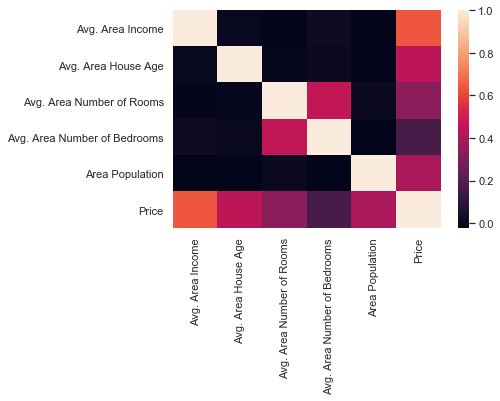

In [10]:
sns.heatmap(housing.corr())

In [12]:
x[x>0.3]

Avg. Area Income             0.639734
Avg. Area House Age          0.452543
Avg. Area Number of Rooms    0.335664
Area Population              0.408556
Price                        1.000000
Name: Price, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
y=housing['Price']

In [16]:
x=housing[['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms']]

In [17]:
reg = LinearRegression()

In [19]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
reg.coef_

array([2.15827436e+01, 1.65657872e+05, 1.51961198e+01, 1.21598165e+05])

In [22]:
coeffSummary = pd.DataFrame({'Var':['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms'] ,'Coeff' : reg.coef_ })

In [23]:
coeffSummary

,Var,Coeff
0,Avg. Area Income,21.582744
1,Avg. Area House Age,165657.872433
2,Area Population,15.196120
3,Avg. Area Number of Rooms,121598.164616


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
y_pred = reg.predict(housing[['Avg. Area Income','Avg. Area House Age','Area Population','Avg. Area Number of Rooms']])

In [27]:
y_pred

array([1223793.47844708, 1496200.36730175, 1252510.95845271, ...,
       1021507.04339172, 1261666.07101436, 1301584.64822932])

In [28]:
mean_squared_error(y_pred,y)

10222991909.538935